In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data=pd.read_csv("/content/data.csv")
data.drop(["Unnamed: 32"],axis=1,inplace=True)
display(data.head()) 

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
data["diagnosis"] = data.diagnosis.map({"M":"0","B":"1"}) 
data.replace([np.inf, -np.inf], np.nan, inplace=True) 
data["diagnosis"]=pd.to_numeric(data["diagnosis"],errors="coerce") 

**Split data into training and testing sets**

In [6]:
X=data.iloc[:,2:32]
Y=data.iloc[:,1]

for col in X.columns:
    X[col][np.isinf(X[col])]=X[col].mean()

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
data.corr().diagnosis.sort_values(ascending=False).iloc[1:21][::-1].index

Index(['compactness_worst', 'radius_se', 'perimeter_se', 'area_se',
       'texture_worst', 'smoothness_worst', 'symmetry_worst', 'texture_mean',
       'concave points_se', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_worst', 'compactness_se', 'concavity_se',
       'fractal_dimension_se', 'id', 'symmetry_se', 'texture_se',
       'fractal_dimension_mean', 'smoothness_se'],
      dtype='object')

In [9]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Random Forest Classifier

In [10]:
rfc=RandomForestClassifier(n_estimators=60,random_state=0)
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=60, random_state=0)

In [11]:
Y_pred=rfc.predict(X_test)

Precision: 0.971 
Recall: 1.0 
F1-Score: 0.985 
Accuracy: 98.25% 



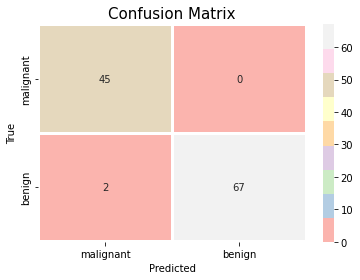

In [12]:
cm=confusion_matrix(Y_pred,Y_test)
class_label = ["malignant", "benign"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
Random_forest_classifier_accuracy=round(acs(Y_test,Y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), Random_forest_classifier_accuracy) +"% \n")

sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()